# Epsilon Greedy

2023 Reinforcement Learning

Kyung Hee University

# Environment: Frozen Lake

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

- Action Space : Discrete(4)
- Observation Space : Discrete(64)

## Action Space
The agent takes a 1-element vector for actions. The action space is (dir), where dir decides direction to move in which can be:

0: LEFT

1: DOWN

2: RIGHT

3: UP

## Observation Space
the 8x8 map has 64 possible observations.

## Rewards
Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

# Example (4X4 Frozen Lake)
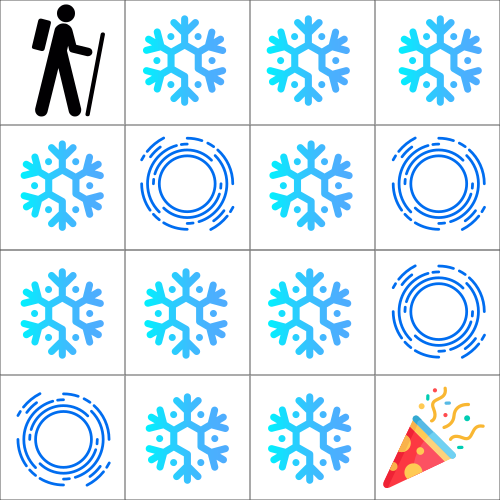

In [1]:
import numpy as np 
import gym
import random
from gym.envs.registration import register
import matplotlib.pyplot as plt
import time

if 'FrozenLake8x8NotSlippery-v0' in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs['FrozenLake8x8NotSlippery-v0']

register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=1000,
    reward_threshold=0.8196
)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:440: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(


# Hyperparameter

In [2]:
n_episodes = 1000
gamma = 1.0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Action Function

In [3]:
# Exploitation
def greedy_action(state,Q):

  action=np.argmax(Q[state,:])

  return action

# Exploration
def e_greedy_action(state,Q,epsilon):
  
  if np.random.rand() < epsilon:
      action = env.action_space.sample()
  else:
      action = np.argmax(Q[state, :])

  return action

# MC

In [11]:
# MC
env = gym.make("FrozenLake8x8NotSlippery-v0")
s_q = np.zeros([env.observation_space.n, env.action_space.n])
n_q = np.zeros([env.observation_space.n, env.action_space.n])
print(s_q.shape)
Reward_list = []
score_mc = []

for i in range(n_episodes):

    state = env.reset()
    transit_list = []
    G = 0.0
    done = False
    
    while not done:

        action = greedy_action(state,s_q)
        new_state, reward, done, _ = env.step(action)
        G = G + reward
        transit_list.append((state, action))
        state = new_state

    Reward_list.append(G)

    for (state, action) in transit_list:
      n_q[state, action] += 1.0
      learning_rate = 1.0 / n_q[state, action]
      s_q[state, action] += learning_rate * (G - s_q[state, action])
      # moving reward: 0, gamma: 1 이므로, 최종 GT 값이 전체 state의 Gt 와 동일

    if (i+1) % 100 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_mc.append(sum(Reward_list)/i)


env.close()

(16, 4)
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000
Current score: 0.000


# e-greedy MC

In [14]:
# e-greedy MC
env.close()
env = gym.make("FrozenLake8x8NotSlippery-v0")
s_q = np.zeros([env.observation_space.n, env.action_space.n])
n_q = np.zeros([env.observation_space.n, env.action_space.n])
Reward_list = []
score_e_mc = []

current_epsilon=1.0
k = 1.0
learning_rate = 0.1

for i in range(n_episodes):

    state = env.reset()
    transit_list = []
    G = 0.0
    done = False

    while not done:
        current_epsilon = 1.0 / (k*0.01)
        action = e_greedy_action(state,s_q,current_epsilon)
        new_state, reward, done, _ = env.step(action)
        G = G + reward
        transit_list.append((state, action))
        state = new_state
    
    k = k + 1.0
    Reward_list.append(G)

    for (state, action) in transit_list:
      n_q[state, action] += 1.0
      # learning_rate = 1.0 / n_q[state, action]
      s_q[state, action] += learning_rate * (G - s_q[state, action])

    if (i+1) % 100 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_e_mc.append(sum(Reward_list)/i)


env.close()

Current score: 0.020
Current score: 0.025
Current score: 0.154
Current score: 0.273
Current score: 0.355
Current score: 0.424
Current score: 0.482
Current score: 0.536
Current score: 0.565
Current score: 0.589


# SARSA

In [9]:
#SARSA

score_sarsa=[]
env.close()
env = gym.make("FrozenLake8x8NotSlippery-v0")
Q = np.zeros([env.observation_space.n, env.action_space.n])
Reward_list = []

current_epsilon=1.0
k = 1.0
lr=1e-2

for i in range(n_episodes):

    state = env.reset()
    done = False
    G=0

    while not done:
        current_epsilon = 1.0 / (k*0.01)
        action = e_greedy_action(state,Q,current_epsilon)
        new_state, reward, done, _ = env.step(action)

        new_action=e_greedy_action(new_state,Q,current_epsilon)

        td_target=reward+gamma*Q[new_state,new_action]*(1-done)
        Q[state,action]+=lr*(td_target-Q[state,action])

        state = new_state
        G+=reward

    k = k + 1.0
    Reward_list.append(G)


    if (i+1) % 100 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_sarsa.append(sum(Reward_list)/i)


env.close()

Current score: 0.010
Current score: 0.010
Current score: 0.114
Current score: 0.233
Current score: 0.331
Current score: 0.404
Current score: 0.464
Current score: 0.517
Current score: 0.562
Current score: 0.594


# Backward View Sarsa(λ)

In [7]:
# Lambda SARSA

lmbda=0.9

env.close()
score_lambda_sarsa=[]
env = gym.make("FrozenLake8x8NotSlippery-v0")
Q = np.zeros([env.observation_space.n, env.action_space.n])
Reward_list = []

current_epsilon=1.0
k = 1.0
lr=1e-2

for i in range(n_episodes):

    state = env.reset()
    done = False
    G=0
    e = np.zeros([env.observation_space.n, env.action_space.n])

    while not done:
        current_epsilon = 1.0 / (k*0.01)
        action = e_greedy_action(state,Q,current_epsilon)
        new_state, reward, done, _ = env.step(action)

        new_action=e_greedy_action(new_state,Q,current_epsilon)

        td_target=reward+gamma*Q[new_state,new_action]*(1-done)
        delta=td_target-Q[state,action]
        e[state,action]+=1
        # e[state,action]=(1-lr)*e[state,action]+1
        # e[state,action]=1

        for s in range(Q.shape[0]):
          for a in range(Q.shape[1]):
            Q[s,a]+=lr*delta*e[s,a]
            e[s,a]=gamma*lmbda*e[s,a]

        state = new_state
        G+=reward

    k = k + 1.0
    Reward_list.append(G)


    if (i+1) % 100 == 0:
      print("Current score: {:.3f}".format(sum(Reward_list) / i))
      score_lambda_sarsa.append(sum(Reward_list)/i)


env.close()

Current score: 0.020
Current score: 0.126
Current score: 0.237
Current score: 0.313
Current score: 0.391
Current score: 0.461
Current score: 0.525
Current score: 0.563
Current score: 0.596
Current score: 0.625


# Visualization

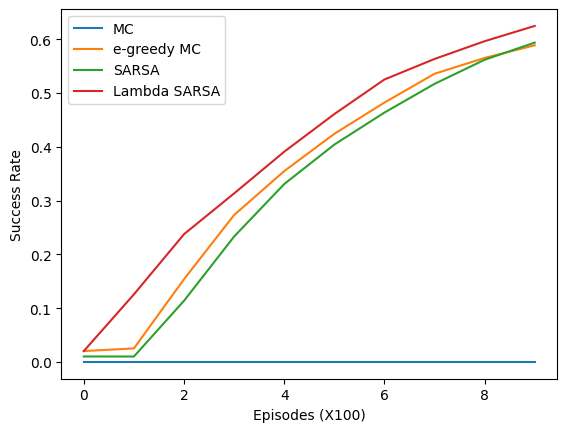

In [15]:
plt.plot(np.arange(len(score_mc)),score_mc)
plt.plot(np.arange(len(score_e_mc)),score_e_mc)
plt.plot(np.arange(len(score_sarsa)),score_sarsa)
plt.plot(np.arange(len(score_lambda_sarsa)),score_lambda_sarsa)
plt.xlabel("Episodes (X100)")
plt.ylabel("Success Rate")
plt.legend(["MC","e-greedy MC","SARSA","Lambda SARSA"])
plt.show()